In [2]:
import pandas as pd

In [35]:
df = pd.read_csv('2013_Salaries__Pennsylvania_State_System_of_Higher_Education.csv', index_col=0)
df

,Name,Base Pay,University or Office,Position
index,,,,
0,"Driscoll, Michael Allan",$275000,Indiana,University President
1,"Weisenstein, Greg R",$241935,West Chester,University President
2,"Welsh, Marcia L",$230000,East Stroudsburg,University President
3,"Norton, Cheryl J.",$225000,Slippery Rock,University President
4,"Wollman, Julie E.",$225000,Edinboro,University President
...,...,...,...,...
12627,"Black, Jacqueline D",$1254,Edinboro,"Instructor, PT Temp"
12628,"Webster, Kim",$1245,Kutztown,Instructor
12629,"Hanelly, William T",$152950,Lock Haven,Vice President/Fin.Admin


In [4]:
df.Position.unique()

array(['University President', 'Provost & VP Academic Affairs',
       'Provost & VP for Academic Affairs', ...,
       'Vice President/Fin.Admin',
       'Vice Chancellor Academic & Student Affairs', 'Chancellor'],
      shape=(3315,), dtype=object)

<Axes: ylabel='index'>

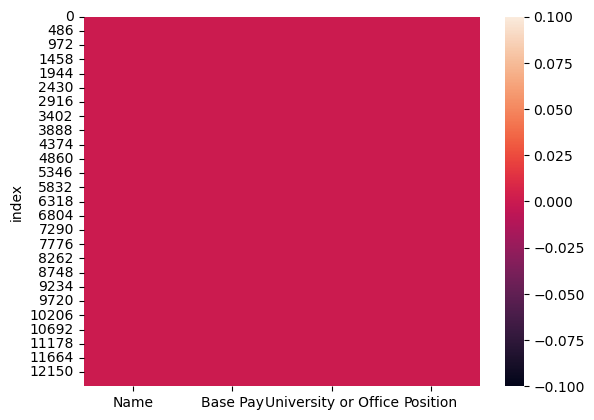

In [6]:
import seaborn as sns
sns.heatmap(df.isnull())

<Axes: xlabel='Base Pay', ylabel='Count'>

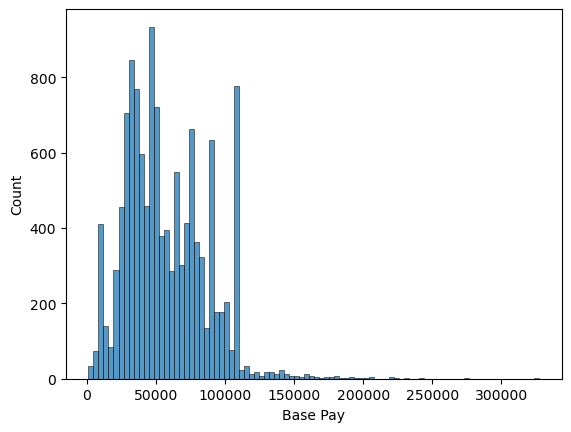

In [15]:
def replace_dollar(base_pay):
    return int(base_pay.replace('$', ''))

df["Base Pay"] = df["Base Pay"].apply(replace_dollar)

    
sns.histplot(df["Base Pay"])

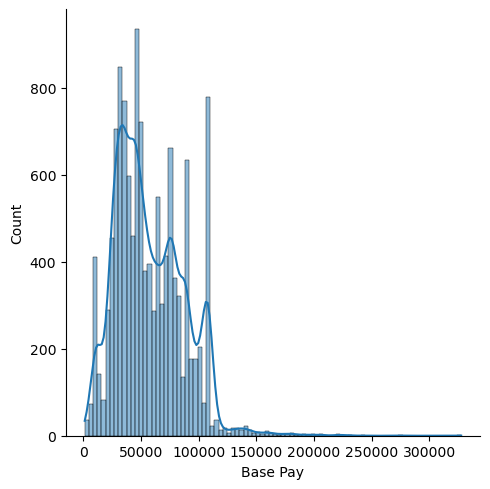

In [16]:
sns.displot(df["Base Pay"], kde=True)

In [27]:
from sklearn.preprocessing import FunctionTransformer

def remove_dollar(df):
    df["Base Pay"] = df["Base Pay"].apply(lambda pay : int(pay.replace("$",'')))
    return df
 

In [28]:
transformer = FunctionTransformer(func=remove_dollar) # sale como entrenado ya que no tiene variables internas 
transformer

,func,<function rem...001A689E61580>
,inverse_func,None
,validate,False
,accept_sparse,False
,check_inverse,True
,feature_names_out,None
,kw_args,None
,inv_kw_args,None


In [29]:
df_replaced = transformer.fit_transform(df)
df_replaced

,Name,Base Pay,University or Office,Position
index,,,,
0,"Driscoll, Michael Allan",275000,Indiana,University President
1,"Weisenstein, Greg R",241935,West Chester,University President
2,"Welsh, Marcia L",230000,East Stroudsburg,University President
3,"Norton, Cheryl J.",225000,Slippery Rock,University President
4,"Wollman, Julie E.",225000,Edinboro,University President
...,...,...,...,...
12627,"Black, Jacqueline D",1254,Edinboro,"Instructor, PT Temp"
12628,"Webster, Kim",1245,Kutztown,Instructor
12629,"Hanelly, William T",152950,Lock Haven,Vice President/Fin.Admin


In [34]:
#def remove_dollar(df):
#    return df.apply(lambda pay : int(pay.replace("$",''))) # problema no se puede aplicar a todas las columnas anteriroes porque son series 
    # por ende necesitamos obtener las columnas 
def remove_dollar(df):
    return df.apply(lambda serie_ serie.apply(lambda pay : int(pay.replace("$",''))))

df[["Base Pay"]].apply(remove_dollar)
    

SyntaxError: invalid syntax (1235273622.py, line 5)

In [45]:
# Pipeline -> out basepay RobustScaler 
# university y position -> OneHotEncoder 
# name -> drop anomimizar
from sklearn.preprocessing import RobustScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

def remove_dollar(df):
    #remove dollar independert de les columnes que li passem
    for col in df.columns:
        df[col] = df[col].apply(lambda v: int(v.replace("$","")))
    return df

def is_part_time(df):
    # nueva caracteristica a partir de las otras
    df["part_time"]= df[df.Position.apply(lambda p: "P/T" in p or "PT" in p)]
    return df

df = pd.read_csv('2013_Salaries__Pennsylvania_State_System_of_Higher_Education.csv', index_col=0)

pay_transformer = Pipeline(steps=[
    ("dollar", FunctionTransformer(func=remove_dollar)),
    ("scaler", RobustScaler())
])

preprocessor = ColumnTransformer(transformers = [
    ("pay", pay_transformer, ["Base Pay"]),
    ("nominal", OneHotEncoder(), ["University or Office",]),
    ("pt", FunctionTransformer(func=is_part_time), ["Position"]),
    ("anom", "drop", ["Name"])
])

pipe = Pipeline(steps=[("preprocessor", preprocessor)])

pipe.fit_transform(df)

        

ValueError: For a sparse output, all columns should be a numeric or convertible to a numeric.

In [42]:
df[df.Position.apply(lambda p: "/" in p)] # filtramos por /

,Name,Base Pay,University or Office,Position
index,,,,
25,"Blake, Ira K",$182000,Bloomsburg,Provost/VP Academic Affairs
44,"Banks, Ivan",$166860,Cheyney,Provost/Vice President
54,"Barnhart, Bruce D",$159931,California,Acting Provost/VP For Academic Affairs
59,"Mccollum, James E",$159486,Millersville,Chief of Staff/Executive Deputy to Pres
116,"Wells, Marilyn J.",$139250,East Stroudsburg,Vice Provost/Dean of the Grad School
...,...,...,...,...
12588,"Sealy, Ronald Leslie",$5000,California,Men's/Women's Track & Field/CC/Distance
12603,"Dillon, Carl F",$3731,Mansfield,Temp-Inst/Geography
12609,"Podroskey, Frank James",$3731,California,"Temp P/T Instructor, Music"
